In [2]:
import numpy as np 
import pandas  as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('ind.csv', parse_dates=['Date'], index_col='Date')

In [4]:
df.head()

,Temperature_C,pH,Turbidity_NTU,TDS_mg_L,Conductivity_uS_cm,DO_mg_L,BOD_mg_L,Salinity_ppt,Anomaly_Type
Date,,,,,,,,,
2024-01-01,29.664283,8.187522,28.000970,863.725521,987.597726,4.946232,13.646083,2.409275,Normal
2024-01-02,31.911415,6.753640,23.307607,1256.538583,1324.440471,3.173277,16.880047,2.351577,Normal
2024-01-03,28.802259,6.236391,27.531944,757.365458,1276.267272,2.239947,9.864705,2.318530,Normal
2024-01-04,28.861437,7.895962,20.507732,1193.509837,1692.253124,2.269477,15.742468,1.524340,Normal
2024-01-05,29.167469,7.515035,16.588710,539.711208,1496.884568,3.772261,7.031283,1.220284,Normal


In [5]:
df.isnull().sum()
# no null values in the dataset 

Temperature_C         0
pH                    0
Turbidity_NTU         0
TDS_mg_L              0
Conductivity_uS_cm    0
DO_mg_L               0
BOD_mg_L              0
Salinity_ppt          0
Anomaly_Type          0
dtype: int64

In [6]:
df.describe()

,Temperature_C,pH,Turbidity_NTU,TDS_mg_L,Conductivity_uS_cm,DO_mg_L,BOD_mg_L,Salinity_ppt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,29.990164,6.599116,60.619383,1242.353081,1388.593572,2.343254,21.374487,1.478553
std,1.142931,0.788743,37.043199,447.502938,335.298622,1.247951,10.662356,0.562134
min,28.000964,5.514559,10.028674,506.788174,800.492347,0.504368,5.000792,0.505264
25%,28.987862,5.993035,30.705193,896.247347,1102.667761,1.267548,13.152048,0.992541
50%,29.961796,6.436967,54.563363,1185.538621,1356.257407,2.152538,19.230574,1.483714
75%,30.998903,7.052241,81.651521,1512.194931,1656.983776,3.392995,28.311084,1.971871
max,31.966745,8.497262,181.286194,3108.308145,1995.215340,4.978412,59.524957,2.490319


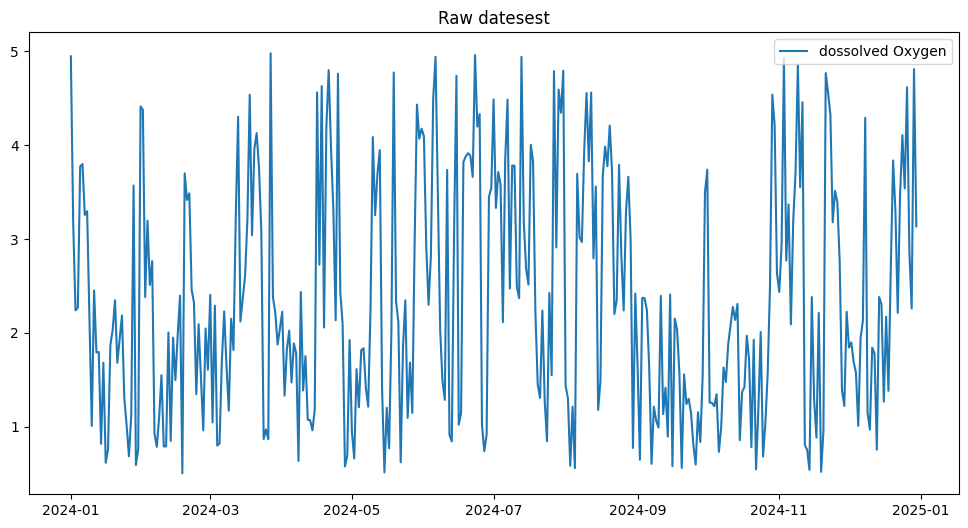

In [7]:
#ploting the time series to check for any anomalies
plt.figure(figsize=(12,6))
plt.plot(df['DO_mg_L'], label = 'dossolved Oxygen')
plt.title("Raw datesest")
plt.legend()
plt.show()

In [8]:
#lets remove the outliers 
'''Q1 = df['DO_mg_L'].quantile(0.25)
Q3 = df['DO_mg_L'].quantile(0.75)
IQR = Q3 - Q1'''

"Q1 = df['DO_mg_L'].quantile(0.25)\nQ3 = df['DO_mg_L'].quantile(0.75)\nIQR = Q3 - Q1"

In [9]:
'''lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR'''

'lower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR'

In [10]:
'''outliers = df[(df['DO_mg_L']<lower_bound) | (df['DO_mg_L']>upper_bound)]
print(f"Outlier detected: {len(outliers)}")'''

'outliers = df[(df[\'DO_mg_L\']<lower_bound) | (df[\'DO_mg_L\']>upper_bound)]\nprint(f"Outlier detected: {len(outliers)}")'

In [11]:
# removing the outliers from the dataset 
'''df = df[(df['DO_mg_L'] >= lower_bound) | (df['DO_mg_L'] <= upper_bound)]'''

"df = df[(df['DO_mg_L'] >= lower_bound) | (df['DO_mg_L'] <= upper_bound)]"

In [12]:
df.head()

,Temperature_C,pH,Turbidity_NTU,TDS_mg_L,Conductivity_uS_cm,DO_mg_L,BOD_mg_L,Salinity_ppt,Anomaly_Type
Date,,,,,,,,,
2024-01-01,29.664283,8.187522,28.000970,863.725521,987.597726,4.946232,13.646083,2.409275,Normal
2024-01-02,31.911415,6.753640,23.307607,1256.538583,1324.440471,3.173277,16.880047,2.351577,Normal
2024-01-03,28.802259,6.236391,27.531944,757.365458,1276.267272,2.239947,9.864705,2.318530,Normal
2024-01-04,28.861437,7.895962,20.507732,1193.509837,1692.253124,2.269477,15.742468,1.524340,Normal
2024-01-05,29.167469,7.515035,16.588710,539.711208,1496.884568,3.772261,7.031283,1.220284,Normal


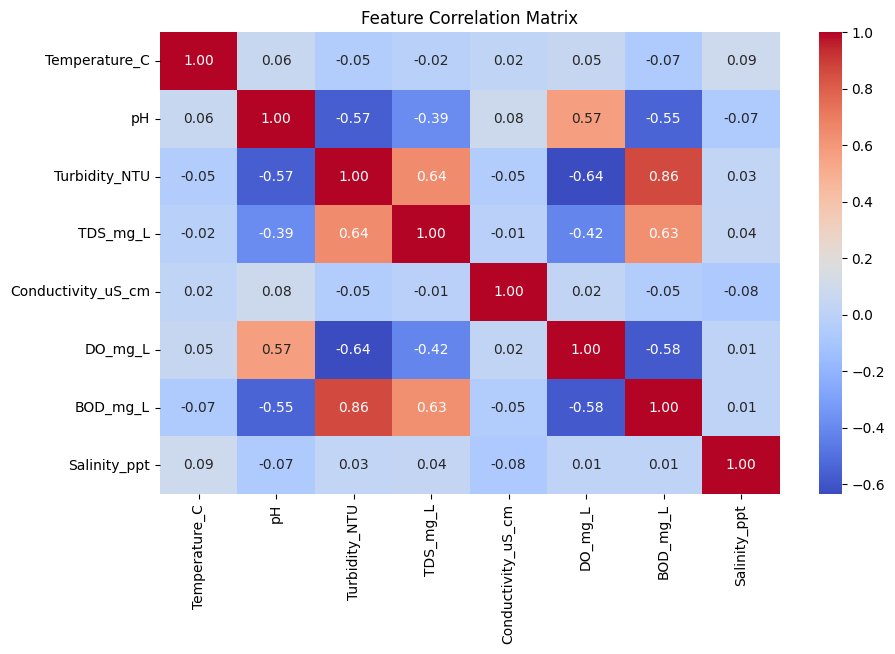

In [13]:
# lets check the correlation of all the features 
df2 = df.copy()
df2 = df2.drop("Anomaly_Type",axis='columns')
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [14]:
#aggreate the mean data per day as we want to see the anomolies per day basis
daily_data = df2.resample('D').mean()
print(daily_data.head())

            Temperature_C        pH  Turbidity_NTU     TDS_mg_L  \
Date                                                              
2024-01-01      29.664283  8.187522      28.000970   863.725521   
2024-01-02      31.911415  6.753640      23.307607  1256.538583   
2024-01-03      28.802259  6.236391      27.531944   757.365458   
2024-01-04      28.861437  7.895962      20.507732  1193.509837   
2024-01-05      29.167469  7.515035      16.588710   539.711208   

            Conductivity_uS_cm   DO_mg_L   BOD_mg_L  Salinity_ppt  
Date                                                               
2024-01-01          987.597726  4.946232  13.646083      2.409275  
2024-01-02         1324.440471  3.173277  16.880047      2.351577  
2024-01-03         1276.267272  2.239947   9.864705      2.318530  
2024-01-04         1692.253124  2.269477  15.742468      1.524340  
2024-01-05         1496.884568  3.772261   7.031283      1.220284  


In [15]:
target = "DO_mg_L"
Q1 = daily_data[target].quantile(0.25)
Q3 = daily_data[target].quantile(0.75)
IQR = Q3 - Q1

lower_bound1 = 1.5 # for industrial areas only the we can make tejh lower bound of the DO values equal to 1.5 or else would be 3 
upper_bound1 = 6.5

print(f"Do IQR bounds are: Lower = {lower_bound1 :.2f}, Upper = {upper_bound1 : .2f}") # based in the mean we are able to find the lower and the upper bounds 

daily_data['iqr_anomoly'] = ((daily_data[target] < lower_bound1) | (daily_data[target]> upper_bound1))

Do IQR bounds are: Lower = 1.50, Upper =  6.50


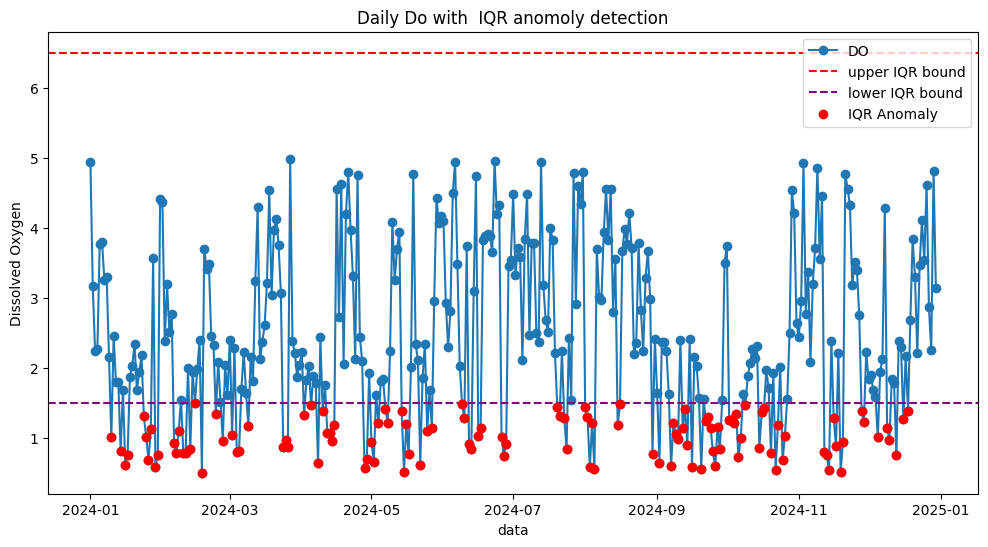

In [16]:
# lets visulize the data incase that there are any anomolies in the data 
plt.figure(figsize=(12,6)) # creates a new figure size
plt.plot(daily_data.index,daily_data[target],label ="DO" , marker = 'o') #index is used for the date and day and the target is going to be DO levels 
plt.axhline(upper_bound1,color='red',linestyle='--',label = "upper IQR bound")
plt.axhline(lower_bound1,color='purple',linestyle='--',label="lower IQR bound") # axhline used to represnts horizontal lines at the specific y-axis values 
plt.scatter(daily_data.index[daily_data['iqr_anomoly']], 
            daily_data[target][daily_data['iqr_anomoly']], 
            color='red', label="IQR Anomaly", zorder=5)
# scatter plot based on the dates on detected anomolies
plt.title("Daily Do with  IQR anomoly detection")
plt.xlabel('data')
plt.ylabel("Dissolved Oxygen")
plt.legend()
plt.show()

ISOLATION-FOREST

In [17]:
# trying to create a isolation foreset model to get the anomalies in the DO and hence we are using the correalted features only right here 
features = ["pH","Turbidity_NTU","BOD_mg_L","Temperature_C"]

In [18]:
random_state = 42


In [21]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100,contamination=0.1,random_state=random_state)
# contamintaion is the thresholds of the outliers in the datasets, these are used to find based on the anomaly scores 
# assuming that 10% of the data present are anomalies meaning that in 356 days - 10 percent are anomalies meaning around 35 to 36 days might show errors 

iso_forest.fit(df2[features]) 

df2["Anomaly_Score"] = iso_forest.decision_function(df2[features])

threshold = np.percentile(df2["Anomaly_Score"], 15) # Bottom 10% are anomalies
# due to it beinng better we are using percentles make sure that the extreme ones values are cutoff and being called as anomalies
# conver the anomaly scores to -1 and 1 

df2["Anomaly_Flag"] = df2["Anomaly_Score"].apply(lambda x: "Anomaly" if x < threshold else "Normal")
# count the anomalies that where deteceterd 

anomaly_counts = df2["Anomaly_Flag"].value_counts()
print(anomaly_counts)

Anomaly_Flag
Normal     310
Anomaly     55
Name: count, dtype: int64


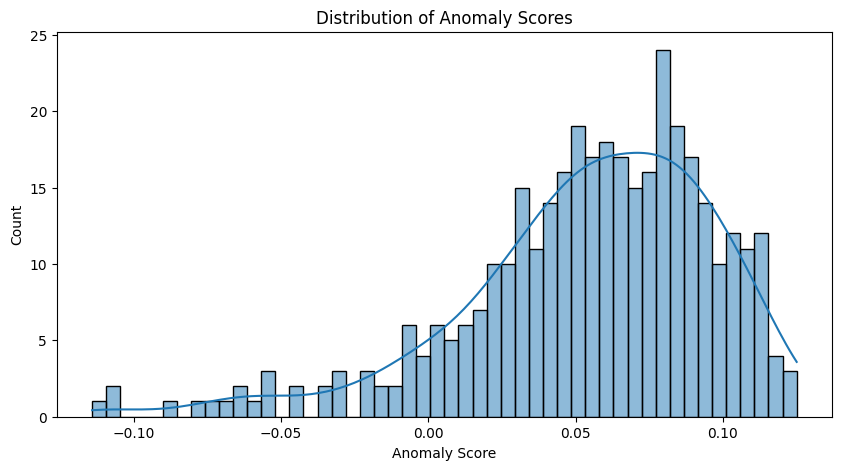

In [25]:
df2["anomaly_score"] = iso_forest.fit(df2[features]).decision_function(df2[features])
plt.figure(figsize=(10, 5))
sns.histplot(df2["anomaly_score"], bins=50, kde=True)
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Count")
plt.show()
# from here i am trying to determine which is the best contamination value to make sure that we get the best anomlies detected as possible ,
#  seeing from here we see the KDE PLOT SAYING MOST values lie between 0.05 and 0.10 
# nno we have to flag the ones at the left tail as well as these are far from the distribution 